# Project: Medical Appointment No Shows :-

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

110.527 medical appointments its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment. Variable names are self-explanatory, and i will be investigating this problem furher.



### Question(s) for Analysis
-  what are the reasons of no showing, whom is responsible for this ?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
% matplotlib inline

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling:

In [2]:
df= pd.read_csv('KaggleV2-May-2016.csv')
df.shape

(110527, 14)

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


columns names need to be changed (Hipertension, No-show)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.duplicated().sum()

0

no null/duplicates values but their is columns can be dropped

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


the Age min value is negative which will be dealt with


### Data Cleaning:


In [7]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [11]:
#drop the negative values
df_x = df.query('Age == "-1" ')
df_x
df.drop(index = 99832, inplace = True )

In [12]:
# rename column 
df.rename({'No-show' : 'No_Show', 'Hipertension' : 'Hypertension'}, axis = 1,  inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
# remove duplicates of PatientId
df['PatientId'].duplicated().sum()

48228

In [14]:
df.drop_duplicates(['PatientId', 'No_Show'], inplace = True)
df.shape

(71816, 14)

In [15]:
#drop unnecessary columns
df.drop(columns = ['PatientId', 'AppointmentID','ScheduledDay', 'AppointmentDay' ], inplace = True)

In [16]:
df.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_Show'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis:




### Research Question1 :  what are the reasons of no showing, whom is responsible for this ?!


In [17]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [18]:
df['No_Show'].value_counts()

No     54153
Yes    17663
Name: No_Show, dtype: int64

In [19]:
# firstly split the data into Appointment No Shows and Shows
Show = df.No_Show == 'No'
NoShow = df.No_Show == 'Yes'

Text(0.5,1,'Influence of Alcoholism ')

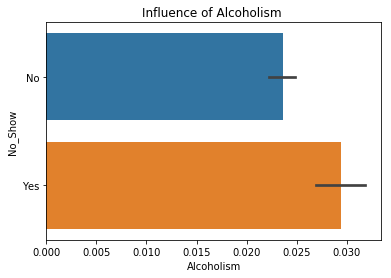

In [40]:
# i would love to see if the Alcoholism Patient shows or no!
df['Alcoholism'].value_counts()
sns.barplot(x= 'Alcoholism', y= 'No_Show', data = df)
plt.title('Influence of Alcoholism ')

okay the Alcoholism NoShow Patients is more than the shows as expected

In [22]:
#lets see if the Gender of the Patient influence the shows 
df['Gender'].value_counts()

F    46466
M    25350
Name: Gender, dtype: int64

females numbers almost double of males maybe cuz the usually responsible for the kids 

In [38]:
def shows(df, column, Show, NoShow):
    df[column][Show].value_counts().hist(alpha = 0.5, bins = 20, label = 'Show')
    df[column][NoShow].value_counts().hist(alpha = 0.5, bins = 20, label = 'NoShow')
    plt.legend();
    plt.title('Influence of Gender')
    plt.xlabel('Gender')
    plt.ylabel('No_Show')

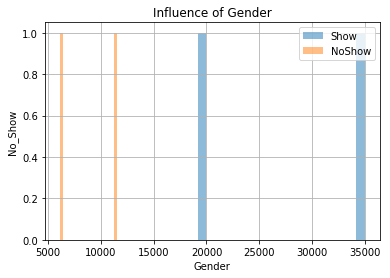

In [39]:
shows(df, 'Gender', Show, NoShow)

No i don't think Gender matters !

In [28]:
#for furhter investigation lets see the Handcap effect on shows 
df['Handcap'].value_counts()

0    70511
1     1178
2      116
3        8
4        3
Name: Handcap, dtype: int64

In [29]:
df[Show]['Handcap'].value_counts()

0    53126
1      931
2       89
3        5
4        2
Name: Handcap, dtype: int64

In [30]:
df[NoShow]['Handcap'].value_counts()

0    17385
1      247
2       27
3        3
4        1
Name: Handcap, dtype: int64

okay i figuerd out that the Handcap(1,2) Patients Shows Percantage is clearly greater than the NoShow

In [31]:
# what is the influence of Scholarship on showing?!
df['Scholarship'].value_counts()

0    64955
1     6861
Name: Scholarship, dtype: int64

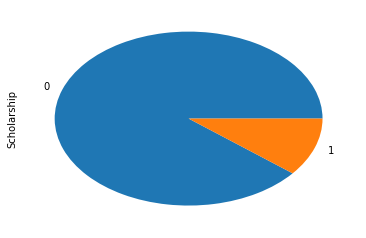

In [32]:
df[NoShow]['Scholarship'].value_counts().plot(kind = 'pie')

No don't think the Scholarship matters.

In [33]:
# the mean age of Show
df[Show].Age.mean()

37.229165512529313

In [34]:
#the mean age of NoShow
df[NoShow].Age.mean()

34.376266772348977

the mean age of Shows is bigger than the Noshow

Text(0,0.5,'num_Patients')

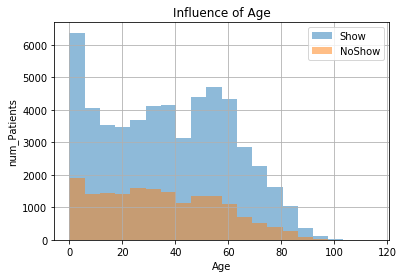

In [37]:
df.Age[Show].hist(alpha=0.5, bins=20, label='Show')
df.Age[NoShow].hist(alpha=0.5, bins=20, label='NoShow')
plt.legend();
plt.title('Influence of Age')
plt.xlabel('Age')
plt.ylabel('num_Patients')

by using hist its looks like vice versa!

<a id='conclusions'></a>
## Conclusions

- Firstly, i can summarize my Data Wrangling and Data Cleaning : i faced no problem at all assessing the data and clean it as it just contains few errors,like negative Age value and some un porper columns name like(hiper and the - instead of _).
and some id duplicates that i dropped to make the analysis clear.
- second the analyzing process was a little bit complicated and i found that :-
  - The Alcoholism Patient number whom Show is less than the NoShow as expected.
  - Then we investigated through the Gender and found that it didn't influence the Patients shows.
  - For furhter investigation we checked the influence of the Handcap on showing and found that Handcap(1,2) Patients Shows    
    Percantage is clearly greater than the NoShow.
  - Then what is the influence of Scholarship on showing?! i found that its almost has no influence on shows.
  - And the mean age of Shows is bigger than the Noshow but the hist illustrates its vice versa.
- Finally i think we do need more Awareness campaigns to encourage the Patients not to hesitate to go to the doctor
  and also we need to reconsider the appointment schedule of the Patients.

limitations :-
it was the (PatientId, AppointmentID, ScheduledDay, AppointmentDay) data.
  





In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0